In [2]:
import netket as nk
import json
from qutip import *
import numpy as np
import time
import multiprocessing as mp
from collections import OrderedDict
from pickle import dump
import os
import matplotlib.pyplot as plt
import scipy
from matplotlib import gridspec
from functools import reduce
from functools import wraps
plt.style.use('seaborn')
from scipy.stats import norm
import matplotlib
matplotlib.rcParams["figure.dpi"] = 100

In [3]:
def CSHam(N, B, Ak):
    # Make graph with of length N with no periodic boundary conditions
    g = nk.graph.Hypercube(length=N, n_dim=1, pbc=False)
    # Spin based Hilbert Space
    hilbertSpace = nk.hilbert.Spin(s=0.5, N=g.n_nodes)
    # Define spin operators with \hbar set to 1
    sz = 0.5 * np.array([[1, 0], [0, -1]])
    sx = 0.5 * np.array([[0, 1], [1, 0]])
    sy = 0.5 * np.array([[0, -1j], [1j, 0]])
    operators = []
    sites = []
    # Central spin term
    operators.append((B * sz).tolist()) #array to list(ordered and changeable)
    sites.append([0])
    # Interaction term
    itOp = np.kron(sz, sz) + np.kron(sx, sx) + np.kron(sy, sy) #kronecker product here
    for i in range(N - 1):
        operators.append((Ak[i] * itOp).tolist())
        sites.append([0, (i+1)])  #pretty convoluted indexing, but ok
    # Create hamiltonian
    hamiltonian = nk.operator.LocalOperator(hilbertSpace, operators=operators, acting_on=sites, dtype=complex)
    #acting_on specifier necessary as this is a central spin model
    return hamiltonian, hilbertSpace
def exactDiagonalization_full(hamiltonian):
    # Changes Hamiltonian to matrix form
    haMatrix = hamiltonian.to_dense()
    # Gets eigenvalues and vectors
    eigenValues, v = np.linalg.eigh(haMatrix)
    # Orders from smallest to largest
    eigenVectors = [v[:, i] for i in range(len(eigenValues))]
    return eigenValues, eigenVectors

N = 6
Ak = []

alpha = 1   #density of RBM
M = alpha*N
# Constant A
B = 0.95
# Variable A
A = N/2
N0 = N/2
for i in range(N-1):
    # Constant A
    #Ak_i = 1
    # Variable A
    Ak_i = A / (N0) * np.exp(-i / N0)
    Ak.append(Ak_i)
    
# Define hamiltonian and hilbert space
ha, hi = CSHam(N,B,Ak)

#Exact Diagonalization
e, v = exactDiagonalization_full(ha)

In [11]:
#load original data first
N6_con = []
with open('2021_summer_data/ex_hist_var_rmsprop_only_excited_N6M6.json') as f:
    for line in f:
        N6_con.append(json.loads(line))


In [12]:
#now get histogram data for energy
eng_list0 = []
eng_list1 = []
eng_list2 = []
eng_list3 = []
eng_list4 = []

eng_part = N6_con[0]
for eng_list in eng_part:
    eng_list0.append(eng_list[0])
    eng_list1.append(eng_list[1])
    eng_list2.append(eng_list[2])
    eng_list3.append(eng_list[3])
    eng_list4.append(eng_list[4])

#similarly for state vector errors
sta_list0 = []
sta_list1 = []
sta_list2 = []
sta_list3 = []
sta_list4 = []

sta_part = N6_con[1]
for sta_list in sta_part:
    sta_list0.append(sta_list[0])
    sta_list1.append(sta_list[1])
    sta_list2.append(sta_list[2])
    sta_list3.append(sta_list[3])
    sta_list4.append(sta_list[4])
print(eng_list0)

[-1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704, -1.4151653778530704]


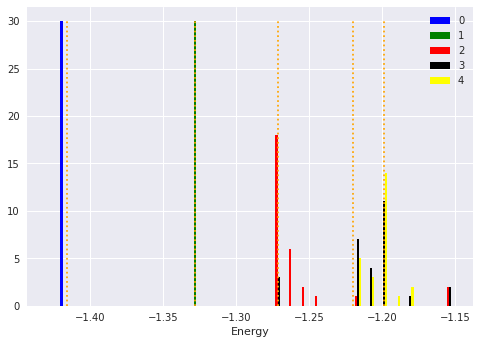

In [14]:
e_0 = np.array(eng_list0)
e_1 = np.array(eng_list1)
e_2 = np.array(eng_list2)
e_3 = np.array(eng_list3)
e_4 = np.array(eng_list4)

del_e = np.stack((e_0, e_1, e_2, e_3, e_4),axis=1)
colors = ['blue', 'green','red', 'black', 'yellow']

bins = np.arange(-1.43, -1.15, 0.00902)
#bins = np.arange(-1.84, -1.75, 0.003)
plt.hist(del_e, bins=bins,color = colors, label = ['0','1','2','3', '4'])
plt.vlines([e[0], e[1], e[2], e[3],e[4]], ymin = 0, ymax = 30, color = 'orange', linestyles = 'dotted')
plt.xlabel('Energy')
plt.legend()
plt.show()


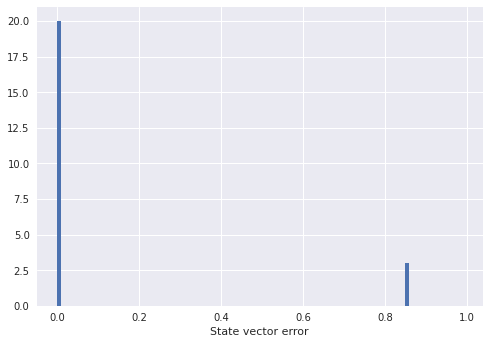

In [17]:
sta0 = np.array(sta_list0)
sta1 = np.array(sta_list1)
sta2 = np.array(sta_list2)
sta3 = np.array(sta_list3)
bins = np.arange(0, 1, 0.01)
plt.hist(sta3, bins=bins)

plt.xlabel('State vector error')
plt.legend()
plt.show()


In [25]:
print([e[0]])

[-1.4152494317083466]
